<a href="https://colab.research.google.com/github/ANUPRIYAR/Feature_selection/blob/main/chisquare_test_FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('/content/drive/MyDrive/Deep_learning/Datasets/Financial_Habits/new_churn_data.csv', na_values=('na'))

In [60]:
df.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,NaN,0,0,0,0,0,0,0,0,0,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,0,0,5,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,0,0,9,1,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,0,0,26,1,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,NaN,0,0,2,0,0,0,0,0,0,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [61]:
df = df.dropna(how='any')

In [62]:
df['churn'] = df['churn'].astype('object')
df['app_downloaded'] = df['app_downloaded'].astype('object')
df['web_user'] = df['web_user'].astype('object')
df.drop('zodiac_sign', axis=1, inplace=True)

In [63]:
categorical_cols = df.select_dtypes('object').columns

In [64]:
df[categorical_cols].head()

,churn,housing,app_downloaded,web_user,payment_type
1,0,R,1,1,Weekly
2,0,R,1,0,Semi-Monthly
3,0,R,1,0,Bi-Weekly
5,1,R,1,1,Bi-Weekly
8,0,R,1,1,Bi-Weekly


In [65]:
# label encoding the data 
encoding= LabelEncoder()
df['housing'] = encoding.fit_transform(df['housing'])
df['payment_type']= encoding.fit_transform(df['payment_type'])

In [66]:
df_cat = df[categorical_cols]

In [70]:
df.reset_index(inplace=True)

In [71]:
X = df_cat.drop('churn', axis=1)
Y = df_cat['churn']

In [73]:
Y = Y.astype('int')

# **Chi-square Test**

In [74]:
chi_scores = chi2(X,Y)

In [83]:
chi_scores[1]

array([1.05303951e-01, 8.42307414e-01, 3.17342240e-02, 2.35981419e-10])

In [92]:
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)

In [93]:
p_values

app_downloaded    8.423074e-01
housing           1.053040e-01
web_user          3.173422e-02
payment_type      2.359814e-10
dtype: float64

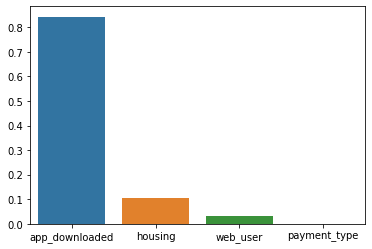

In [95]:
sns.barplot(y=p_values, x=p_values.index)

Since app_downloaded has higher p-value, this says that model is independent of app_downloaded and hence cannot be used for model training